In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from utils import plot_loss_curves
import numpy as np
import matplotlib.pyplot as plt

2023-04-10 11:42:14.387897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 11:42:14.466051: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 11:42:14.467321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 11:42:15.754431: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    # rotation_range=20, # note: this is an int not a float
                                    # width_shift_range=0.2,
                                    # height_shift_range=0.2,
                                    # zoom_range=0.2,
                                    # horizontal_flip=True,
                                    validation_split = 0.2)

In [3]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [4]:
import pandas as pd

df=pd.read_csv('data/train.csv')

In [5]:
df['ClassId']=df['ClassId'].astype(str)

In [6]:
train_data = train_datagen.flow_from_dataframe(dataframe=df,
                                                directory='data/train_images',
                                                target_size=(128, 800), x_col='ImageId',
                                                y_col='ClassId', batch_size=16,
                                                class_mode='categorical', subset = "training",
                                                shuffle=True)

Found 5676 validated image filenames belonging to 4 classes.


In [7]:
valid_data = train_datagen.flow_from_dataframe(dataframe=df,
                                                directory='data/train_images',
                                                target_size=(128, 800), x_col='ImageId',
                                                y_col='ClassId', batch_size=16,
                                                class_mode='categorical', subset = "validation",
                                                shuffle=True)

Found 1419 validated image filenames belonging to 4 classes.


(-0.5, 799.5, 127.5, -0.5)

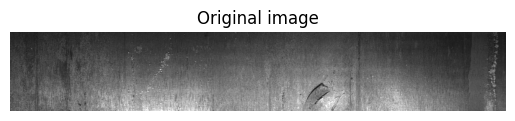

In [10]:
import random
# Get data batch samples
images, labels = train_data.next()
# Show original image and augmented image
random_number = random.randint(0, 16) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

In [13]:
class_count = np.bincount(train_data.classes)

In [14]:
print(class_count)

[ 703  184 4137  652]


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(800, 128, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(4, activation='softmax') # changed to have 4 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [25]:
# Fit the model
history = model.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        class_weight=class_weight)

Epoch 1/5


2023-04-10 11:47:01.124129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 32/355 [=>............................] - ETA: 8:06 - loss: 0.8993 - accuracy: 0.7363

KeyboardInterrupt: 

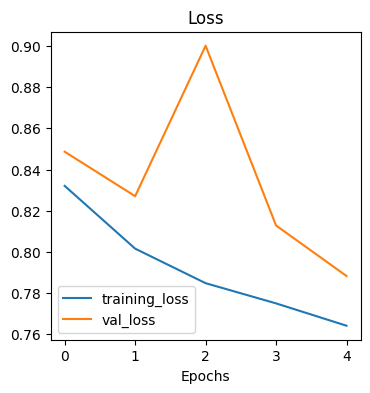

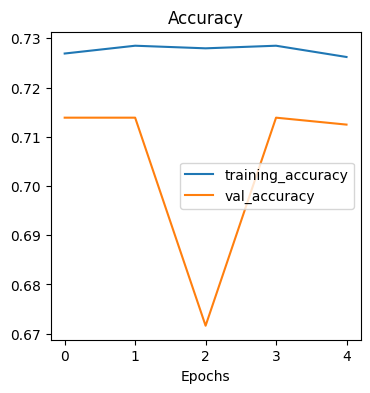

In [26]:
plot_loss_curves(history)

In [32]:
# Save a model
model.save("models/defect_classify")

INFO:tensorflow:Assets written to: models/defect_classify/assets


INFO:tensorflow:Assets written to: models/defect_classify/assets


In [27]:

# Evaluate on the test data
model.evaluate(train_data)

2023-04-06 12:37:19.862606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


355/355 [==============================] - 66s 185ms/step - loss: 0.7470 - accuracy: 0.7290


[0.7470074892044067, 0.7290345430374146]

In [66]:
predicted = model.predict(train_data)

2023-04-06 13:01:44.608128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


355/355 [==============================] - 58s 163ms/step


In [67]:
actual = train_data.classes

In [69]:
len(actual)

5676

In [68]:
predicted = [np.argmax(i) for i in predicted]
len(predicted)

5676

In [70]:
type(actual[0])
type(predicted[0])

numpy.int64

In [71]:
print(actual)

[3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 3, 3, 0, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 0, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 0, 1, 2, 2, 0, 1, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [73]:
print(predicted)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [63]:
predicted_new = []
for i in range(len(predicted)):
    predicted_new.append(np.argmax(predicted[i]))

In [64]:
predicted_new

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [74]:
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(actual, predicted) 

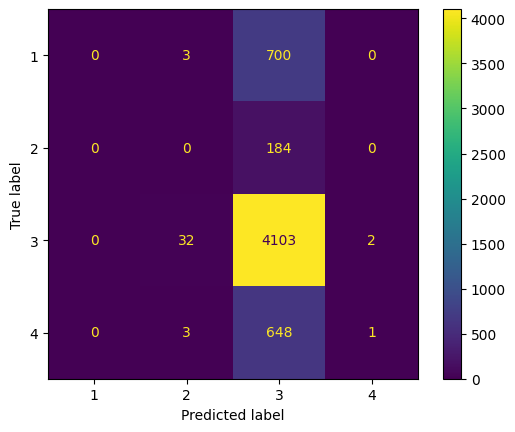

In [75]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3, 4])

cm_display.plot()
plt.show() 

In [31]:
from utils import pred_and_plot
import os
class_names = []
entries = os.listdir('data/train_images/')
for entry in entries:
    # Make a prediction using model_11
    print(np.argmax(pred_and_plot(model=model, 
                filename="data/train_images/"+entry, 
                class_names=class_names)))

3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2


KeyboardInterrupt: 